In [ ]:
from google.colab import files

uploaded = files.upload()

Saving NBA.csv to NBA.csv


In [ ]:
import pandas as pd
df = pd.read_csv('NBA.csv', encoding='latin-1')
df

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT
0,1968,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366
1,1969,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366
2,1970,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024
3,1971,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024
4,1972,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976
...,...,...,...,...,...,...,...,...,...,...,...
1211,2006,Washington Wizards,41,41,26,15,15,26,0.634146,0.365854,0.500000
1212,2007,Washington Wizards,43,39,25,16,18,23,0.609756,0.439024,0.524390
1213,2008,Washington Wizards,19,63,13,28,6,35,0.317073,0.146341,0.231707
1214,2009,Washington Wizards,26,56,15,26,11,30,0.365854,0.268293,0.317073


In [ ]:
#cleanning the data
missing_values_count = df.isnull().sum()
df = df.drop_duplicates()
df = df.dropna()
df = df.dropna(axis=1)
df = df.dropna(how='all')
missing_values_count
print(missing_values_count)

Year         0
Team         0
Wins         0
Loss         0
Home Wins    0
Home Loss    0
Away Wins    0
Away Loss    0
HomePCT      0
AwayPCT      0
TotalPCT     0
dtype: int64


In [ ]:
#cleanning the data by dropping TotalPCT and year
df = df.drop(columns=["TotalPCT"])
df

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT
0,1968,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538
1,1969,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412
2,1970,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000
3,1971,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333
4,1972,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000
...,...,...,...,...,...,...,...,...,...,...
1211,2006,Washington Wizards,41,41,26,15,15,26,0.634146,0.365854
1212,2007,Washington Wizards,43,39,25,16,18,23,0.609756,0.439024
1213,2008,Washington Wizards,19,63,13,28,6,35,0.317073,0.146341
1214,2009,Washington Wizards,26,56,15,26,11,30,0.365854,0.268293


In [ ]:
#adding home game ratio
df['HomeGameRatio'] = df['Home Wins'] / (df['Home Wins'] + df['Home Loss'])
df

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,HomeGameRatio
0,1968,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.700000
1,1969,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.657895
2,1970,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.512195
3,1971,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.536585
4,1972,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.682927
...,...,...,...,...,...,...,...,...,...,...,...
1211,2006,Washington Wizards,41,41,26,15,15,26,0.634146,0.365854,0.634146
1212,2007,Washington Wizards,43,39,25,16,18,23,0.609756,0.439024,0.609756
1213,2008,Washington Wizards,19,63,13,28,6,35,0.317073,0.146341,0.317073
1214,2009,Washington Wizards,26,56,15,26,11,30,0.365854,0.268293,0.365854


In [ ]:
#1st T test (welch)
from scipy import stats

home_wins_total = df['Home Wins'].sum()
away_wins_total = df['Away Wins'].sum()

#welch's t-test
t_statistic, p_value = stats.ttest_ind(df['Home Wins'], df['Away Wins'], equal_var=False)

print("Welch's T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the average number of wins between home and away games.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the average number of wins between home and away games.")


Welch's T-Statistic: 34.98723834929336
P-Value: 2.819267293424131e-217
Reject null hypothesis: There is a significant difference in the average number of wins between home and away games.


In [ ]:
#2nd T test (normal)
t_statistic, p_value = stats.ttest_ind(df['Home Wins'], df['Away Wins'])

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the average number of wins between home and away games.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the average number of wins between home and away games.")


T-Statistic: 34.98723834929336
P-Value: 1.508803477258071e-217
Reject null hypothesis: There is a significant difference in the average number of wins between home and away games.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Year', 'Wins', 'Loss', 'Away Wins']]  # features
y = df['Home Wins']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# hyperparameters
max_depth_values = [5, 10, 15, 20]
n_estimators_values = [50, 100, 150, 200]
min_samples_split_values = [2, 5, 10, 15]


accuracy_scores = []

# nested loops for each hyperparameter
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        for min_samples_split in min_samples_split_values:
            # random Forest regressor
            rf_regressor = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, min_samples_split=min_samples_split, random_state=42)
            rf_regressor.fit(X_train, y_train)

            # accuracy score
            accuracy = rf_regressor.score(X_test, y_test)
            accuracy_scores.append((max_depth, n_estimators, min_samples_split, accuracy))
print(accuracy_scores)


# getting hyperparameter values and accuracy scores
max_depths, n_estimators, min_samples_split, accuracies = zip(*accuracy_scores)
# the "*" was used to unpack the grouped elements into the separate tuples/lists for the values

# maximum accuracy score
best_index = np.argmax(accuracies)

# getting best hyperparameters and accuracy score
best_max_depth = max_depths[best_index]
best_n_estimators = n_estimators[best_index]
best_min_samples_split = min_samples_split[best_index]
best_accuracy = accuracies[best_index]

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters, Accuracy Score, and Mean Squared Error (MSE):")
print(f"Max Depth: {best_max_depth}, Number of Estimators: {best_n_estimators}, Min Samples Split: {best_min_samples_split}")
print(f"Accuracy Score: {best_accuracy}")
print("Mean Squared Error:", mse)

[(5, 50, 2, 0.8836610670388311), (5, 50, 5, 0.8837220862266109), (5, 50, 10, 0.8845683362430803), (5, 50, 15, 0.8842634939681818), (5, 100, 2, 0.8869221680827253), (5, 100, 5, 0.8870596419941488), (5, 100, 10, 0.8878587373352468), (5, 100, 15, 0.8874438409655889), (5, 150, 2, 0.8877324783678622), (5, 150, 5, 0.8878718533592203), (5, 150, 10, 0.8886037178202741), (5, 150, 15, 0.8882436751587013), (5, 200, 2, 0.888960961517806), (5, 200, 5, 0.8890339941521415), (5, 200, 10, 0.8895203827587029), (5, 200, 15, 0.889272679902182), (10, 50, 2, 0.9294530738951279), (10, 50, 5, 0.9309564190229385), (10, 50, 10, 0.9314349478392299), (10, 50, 15, 0.9288194141080449), (10, 100, 2, 0.9289301040223532), (10, 100, 5, 0.9292552945399019), (10, 100, 10, 0.9303261810857806), (10, 100, 15, 0.92763668568848), (10, 150, 2, 0.9299988485208713), (10, 150, 5, 0.9300040551572692), (10, 150, 10, 0.9310173333331788), (10, 150, 15, 0.9281264364758671), (10, 200, 2, 0.9298318321805831), (10, 200, 5, 0.930015876343

In [ ]:
X = df[['Year', 'Wins', 'Loss', 'Away Wins']]  # features
y = df['Home Wins']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# optimal hyperparameters
max_depth = 15
n_estimators = 50
min_samples_split = 10

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

results = pd.DataFrame({"Actual Home Wins": y_test,
                        "Predicted Home Wins": y_pred})
results.index.name = 'Index'
styled_results = results.style.set_caption("Actual vs Predicted Home Wins").\
                                highlight_max(axis=0, color='lightgreen').\
                                highlight_min(axis=0, color='lightcoral')

styled_results

,Actual Home Wins,Predicted Home Wins
Index,,
541,30,32.400483
259,24,24.344314
43,21,17.340083
1005,27,27.195733
584,30,29.992540
310,31,30.494495
657,14,18.625697
1209,29,28.882497
210,11,9.704570


Mean Squared Error: 4.181144025225987
R-squared: 0.9099234923648738


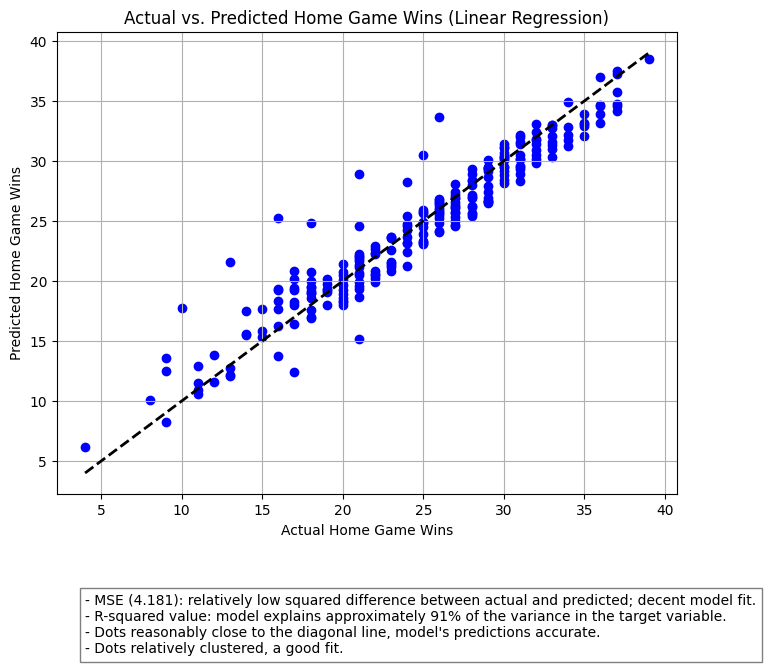

In [ ]:
#1st visualization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
X = df[['Year', 'Wins', 'Loss', 'Away Wins']]  # features
y = df['Home Wins']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

import matplotlib.pyplot as plt

# plotting actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plot the diagonal line
plt.title('Actual vs. Predicted Home Game Wins (Linear Regression)')
plt.xlabel('Actual Home Game Wins')
plt.ylabel('Predicted Home Game Wins')
plt.grid(True)
#text to explain interpretation
text = ("- MSE (4.181): relatively low squared difference between actual and predicted; decent model fit.\n"
        "- R-squared value: model explains approximately 91% of the variance in the target variable.\n"
        "- Dots reasonably close to the diagonal line, model's predictions accurate.\n"
        "- Dots relatively clustered, a good fit.")

plt.text(
    y_test.min(),
    y_test.min() - 15,
    text,
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.5),
)
plt.show()


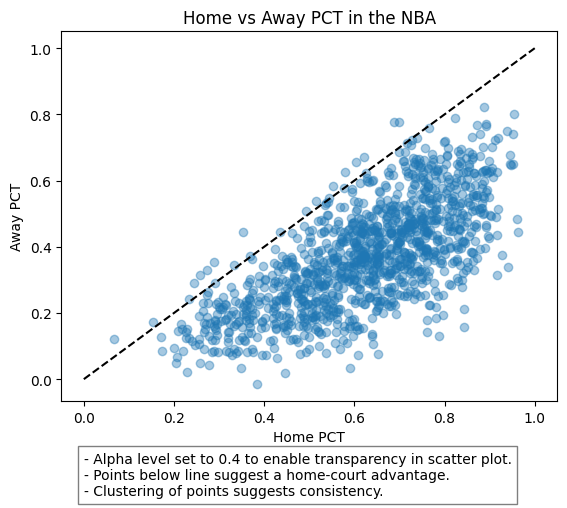

In [ ]:
#2nd visualization
plt.plot(df.HomePCT + np.random.normal(0, 0.01, len(df)), df.AwayPCT + np.random.normal(0, 0.01, len(df)), 'o', alpha=0.4)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('Home PCT')
plt.ylabel('Away PCT')
plt.title('Home vs Away PCT in the NBA')
text = ("- Alpha level set to 0.4 to enable transparency in scatter plot.\n"
        "- Points below line suggest a home-court advantage.\n"
        "- Clustering of points suggests consistency.")
plt.text(
   0,
    -0.35,
    text,
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.5),
)
plt.show()
#scatter plot of the away winning percentage vs the home winning percentage
#the further below the diagonal line the points are, the more significant the home advantage is

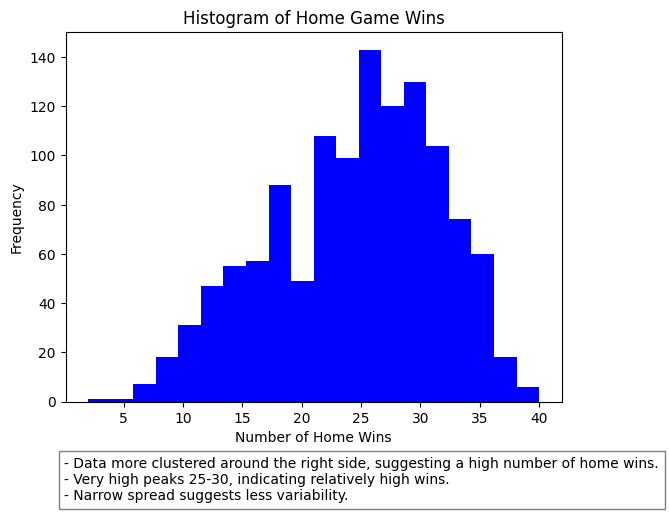

In [ ]:
#3rd visualization
plt.hist(df['Home Wins'], bins=20, color='blue')
plt.title('Histogram of Home Game Wins')
plt.xlabel('Number of Home Wins')
plt.ylabel('Frequency')
text = ("- Data more clustered around the right side, suggesting a high number of home wins.\n"
        "- Very high peaks 25-30, indicating relatively high wins.\n"
        "- Narrow spread suggests less variability.")
plt.text(
    0,
    -40,
    text,
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.5),
)
plt.show()


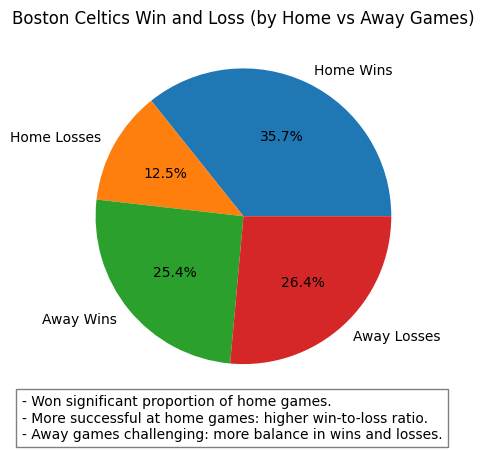

In [ ]:
#4th visualization (based on team with most data)
labels = ['Home Wins', 'Home Losses', 'Away Wins', 'Away Losses']
sizes = [1604, 560, 1139, 1187]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Boston Celtics Win and Loss (by Home vs Away Games)')
text = ("- Won significant proportion of home games.\n"
        "- More successful at home games: higher win-to-loss ratio.\n"
        "- Away games challenging: more balance in wins and losses.")
plt.text(
    -1.5,
    -1.5,
    text,
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.5),
)
plt.show()

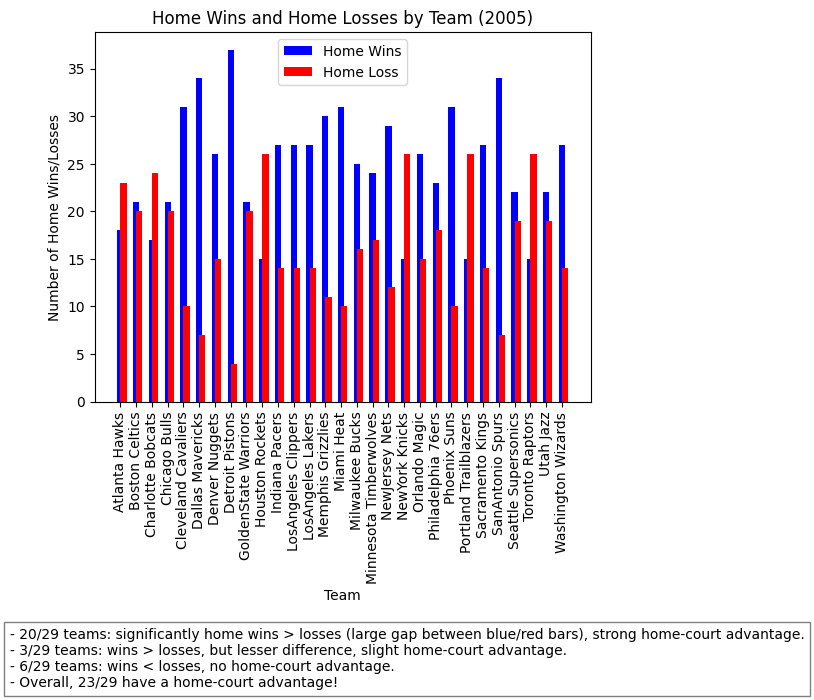

In [ ]:
#5th visualization
data = pd.read_csv('NBA.csv', encoding='latin1')

data_2005 = data[data['Year'] == 2005]

labels = data_2005['Team']
home_wins = data_2005['Home Wins']
home_loss = data_2005['Home Loss']

x = range(len(labels))

plt.bar(x, home_wins, width=0.4, label='Home Wins', color='blue', align='center')
plt.bar(x, home_loss, width=0.4, label='Home Loss', color='red', align='edge')

plt.xlabel('Team')
plt.ylabel('Number of Home Wins/Losses')

plt.title('Home Wins and Home Losses by Team (2005)')
plt.xticks(x, labels, rotation=90)
plt.legend()
text = ("- 20/29 teams: significantly home wins > losses (large gap between blue/red bars), strong home-court advantage.\n"
        "- 3/29 teams: wins > losses, but lesser difference, slight home-court advantage.\n"
        "- 6/29 teams: wins < losses, no home-court advantage.\n"
        "- Overall, 23/29 have a home-court advantage!")
plt.text(
    -7,
    -30,
    text,
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.5),
)

plt.show()

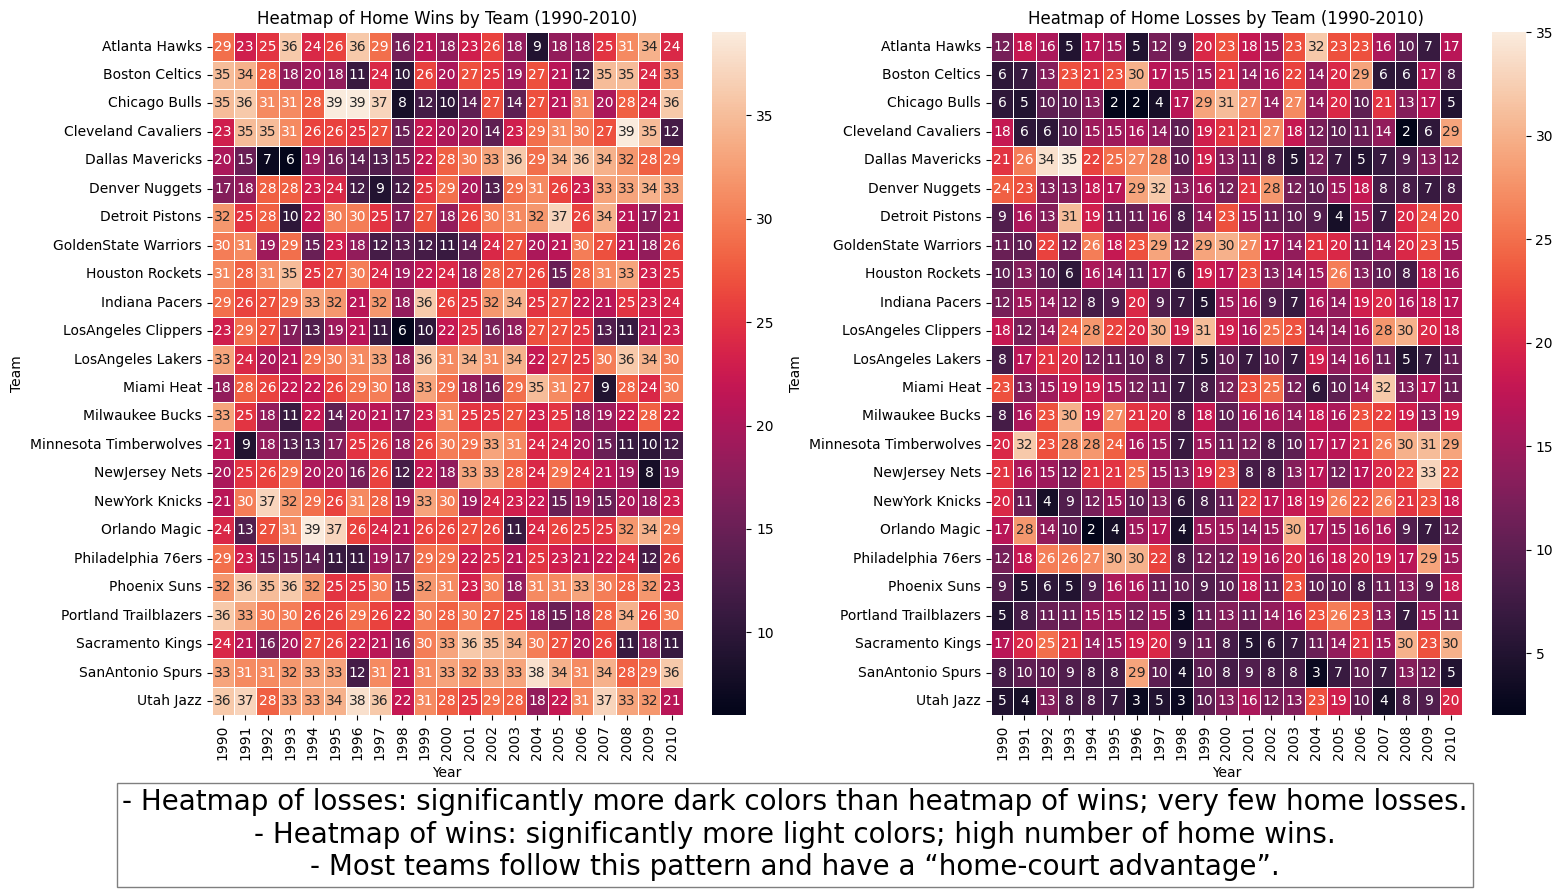

In [ ]:
#6th visualization
import seaborn as sns

data = pd.read_csv('NBA.csv', encoding='latin1')
data_filtered = data[(data['Year'] >= 1990) & (data['Year'] <= 2010)]

team_years = data_filtered.groupby('Team')['Year'].nunique()
teams_with_full_data = team_years[team_years == 21].index
data_filtered = data_filtered[data_filtered['Team'].isin(teams_with_full_data)]

pivoted_wins = data_filtered.pivot_table(index='Team', columns='Year', values='Home Wins')
pivoted_losses = data_filtered.pivot_table(index='Team', columns='Year', values='Home Loss')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.heatmap(pivoted_wins, annot=True, fmt="d", linewidths=.5, ax=axes[0])
axes[0].set_title('Heatmap of Home Wins by Team (1990-2010)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Team')

sns.heatmap(pivoted_losses, annot=True, fmt="d", linewidths=.5, ax=axes[1])
axes[1].set_title('Heatmap of Home Losses by Team (1990-2010)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Team')
text = ("- Heatmap of losses: significantly more dark colors than heatmap of wins; very few home losses.\n"
        "- Heatmap of wins: significantly more light colors; high number of home wins.\n"
        "- Most teams follow this pattern and have a “home-court advantage”.")
fig.text(
    0.5,
    -0.1,
    text,
    fontsize=20,
    bbox=dict(facecolor='white', alpha=0.5),
    ha='center'
)
plt.tight_layout()
plt.show()

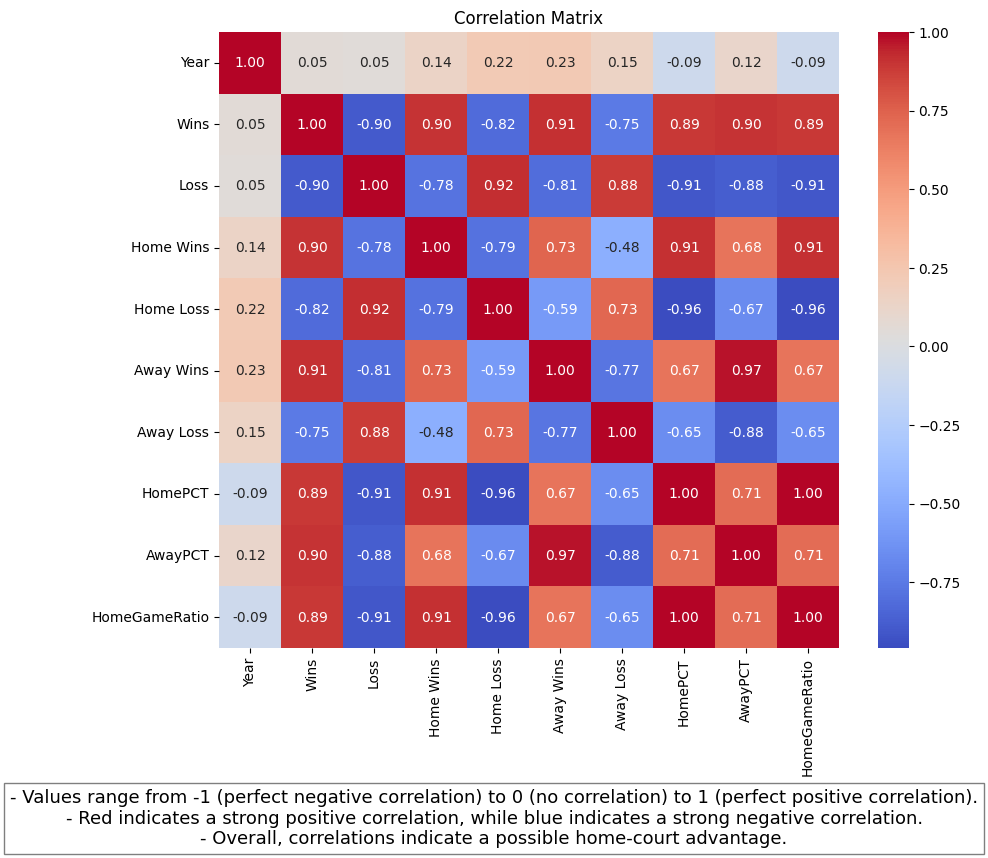

In [ ]:
#7th visualization correlation matrix
#exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
text = ("- Values range from -1 (perfect negative correlation) to 0 (no correlation) to 1 (perfect positive correlation).\n"
        "- Red indicates a strong positive correlation, while blue indicates a strong negative correlation.\n"
        "- Overall, correlations indicate a possible home-court advantage.")
plt.gcf().text(
    0.4,
    -0.135,
    text,
    fontsize=13,
    bbox=dict(facecolor='white', alpha=0.5),
    ha='center'
)
plt.show()